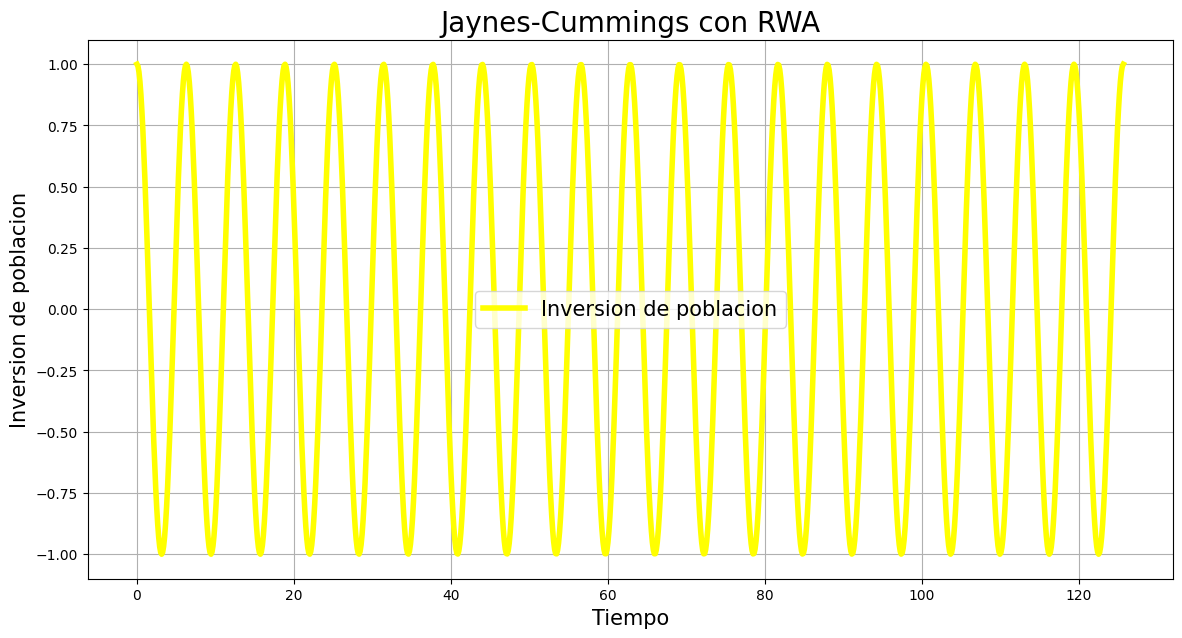

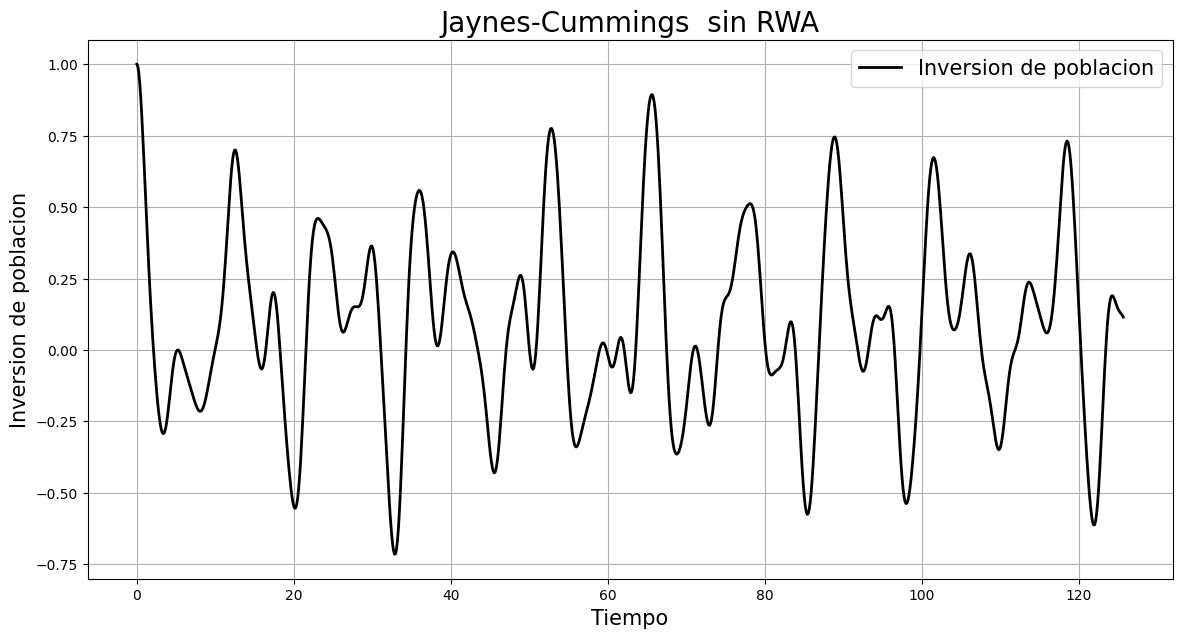

In [59]:
#Ahora quiero resolver la dinámica de un sistema de dos niveles acoplado a un modo de un campo electromagnético.
#Tomando el Hamiltoniano de Jaynes-Cummings como H0
# Importamos las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
from scipy import *

# Definimos las constantes necesarias
hbar = 1.0
N = 2
N1=50
#N1=3
omega_l = 0.5
omega_r = 0.5
omega_m = 0.5
g=0.5
mu=0.5

T=40*np.pi
# Definimos la funcion que nos da el pulso
def pulso(t, args):
    return (np.sin(np.pi*t/T)**2) * np.cos(omega_l * (t-T/2))

def pulso_l(t, args):
    return np.sin(np.pi*t/T)**2

def pulso2(t):
    return (np.sin(np.pi*t/T)**2) * np.cos(omega_l * (t-T/2))

#Escribamos la función analitica para la inversion de poblacion
def inversion0(t,g,n):
    return np.cos(2*g*t*np.sqrt(n+1))

psi01 = tensor(basis(N1, 0), basis(2, 1))  # start with an ground state for the atoms and zero photons
psi00 = tensor(basis(N1, 1), basis(2, 0))  # start with an ground state for the atoms and one photon

# operators
a = tensor(destroy(N1), qeye(2))
sm = tensor(qeye(N1), destroy(2))
#Definamos sigma x y sigma y#plt.plot(t,-(result.expect[2]-result.expect[3]),label="Sigma y - Sigma x")


# Hamiltonian

H_0 = omega_r * a.dag() * a + 0.5*omega_m * (sm.dag() * sm-sm *sm.dag()) + g * (a.dag() + a) * (sm + sm.dag())
H_01 = omega_r * a.dag() * a + 0.5*omega_m * (sm.dag() * sm-sm *sm.dag()) + g * (a.dag()*sm + a*sm.dag()) 
H02 = omega_r * a.dag() * a + 0.5*omega_m * (sm.dag() * sm-sm *sm.dag())

# Definimos el tiempo discreto
num_steps = 1000
t = np.linspace(0, T, num_steps)

HI1 = (sm + sm.dag())*mu
HI2 = (a + a.dag())*0.5
HI3 = ((sm + sm.dag()) + (a + a.dag())*0.5)
HI4 = g * (a.dag()*sm + a*sm.dag())

# Definimos el Hamiltoniano total
H= [H_01, [HI1, pulso]]
H1= [H_01, [HI2, pulso]]
H2 = [H_01, [HI1, pulso], [HI2, pulso]]
H3 = [H02, [HI4, pulso]]


# Resolvemos la ecuacion diferencial
result = mesolve(H_01, psi01, t, [], [a.dag() * a, (sm.dag() * sm-sm *sm.dag()),sm *sm.dag(),sm.dag() * sm])
result2 = mesolve(H_0, psi01, t, [], [a.dag() * a, (sm.dag() * sm-sm *sm.dag()),sm *sm.dag(),sm.dag() * sm])

# Graficamos la inversion de poblacion
plt.figure(figsize=(14,7))
plt.title("Jaynes-Cummings con RWA",fontsize=20)
#plt.plot(t, result.expect[0], label="Número de fotones")
#plt.figure(figsize=(10,5))
plt.plot(t, result.expect[1], label="Inversion de poblacion",color='yellow',lw=4)
#plt.plot(t, pulso2(t)*0.5, label="Pulso")
#plt.plot(t, inversion0(t,g,n=6), label="Inversion de poblacion analitica con n=6",color='black',lw=1.5)
#plt.plot(t, result.expect[0], label="Número de fotones",color='red')
#plt.plot(t, result2.expect[1], label="Inversion de poblacion",lw=1,color='black')
#plt.plot(t, result.expect[2], label="Sigma x")
#plt.plot(t, result.expect[3], label="Sigma y")
plt.grid()
plt.xlabel('Tiempo',fontsize=15)
plt.ylabel('Inversion de poblacion',fontsize=15)

plt.legend(fontsize=15)
plt.show()


plt.figure(figsize=(14,7))
plt.title("Jaynes-Cummings  sin RWA",fontsize=20)
#plt.plot(t, result.expect[0], label="Número de fotones")
#plt.figure(figsize=(10,5))
plt.plot(t, result2.expect[1], label="Inversion de poblacion",color='black',lw=2)
#plt.plot(t, pulso2(t)*0.5, label="Pulso")
#plt.plot(t, inversion0(t,g,n=6), label="Inversion de poblacion analitica con n=6 y RWA",color='black',lw=1.5)
#plt.plot(t, result.expect[0], label="Número de fotones",color='red')
#plt.plot(t, result2.expect[1], label="Inversion de poblacion",lw=1,color='black')
#plt.plot(t, result.expect[2], label="Sigma x")
#plt.plot(t, result.expect[3], label="Sigma y")
plt.grid()
plt.xlabel('Tiempo',fontsize=15)
plt.ylabel('Inversion de poblacion',fontsize=15)

plt.legend(fontsize=15)
plt.show()



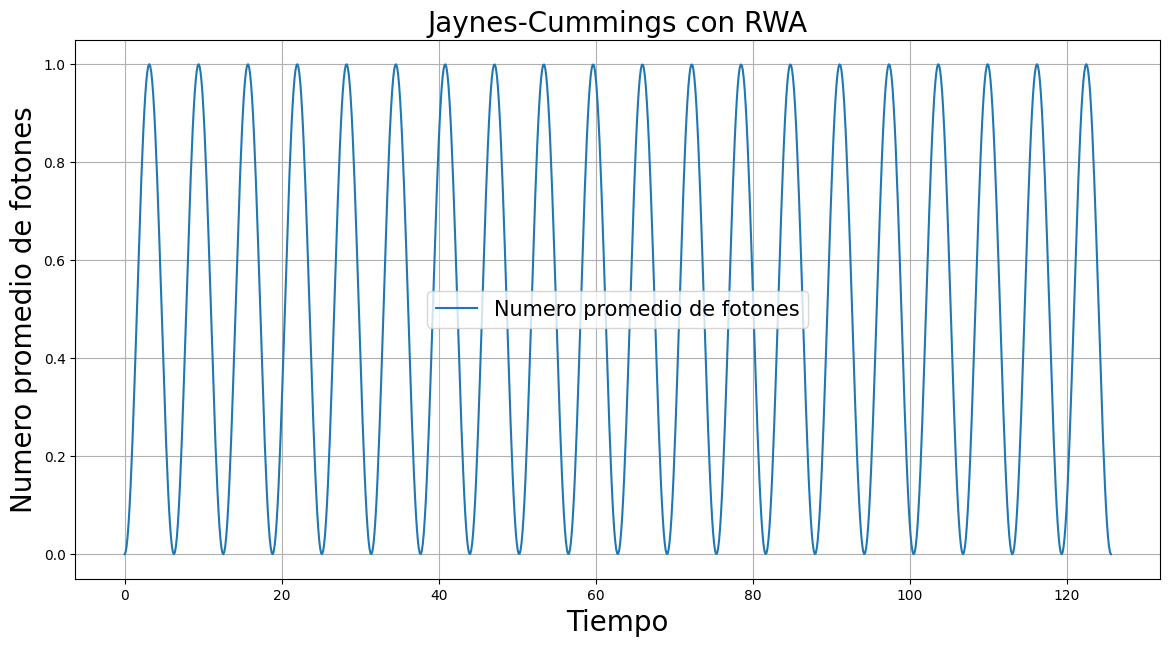

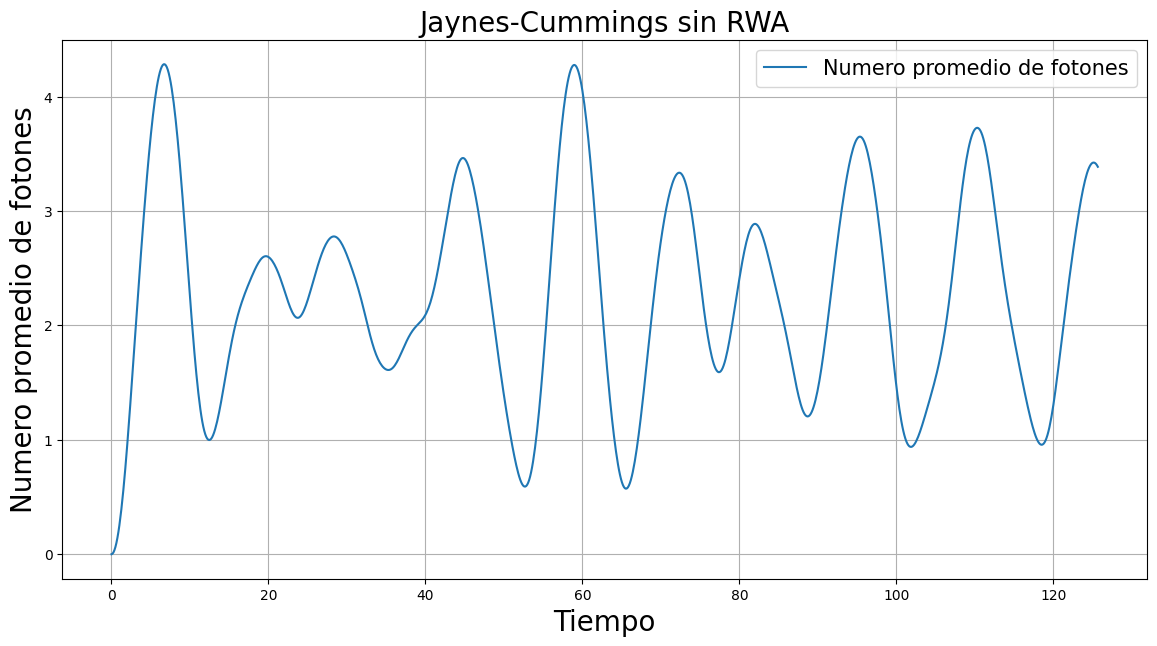

In [60]:
# Graficamos la inversion de poblacion
plt.figure(figsize=(14,7))
plt.title("Jaynes-Cummings con RWA",fontsize=20)
#plt.plot(t, result.expect[0], label="Número de fotones")
#plt.figure(figsize=(10,5))
#plt.plot(t, result.expect[1], label="Inversion de poblacion")
plt.plot(t,result.expect[0],label="Numero promedio de fotones")
#plt.plot(t, pulso2(t)*20, label="Pulso")
plt.grid()
plt.xlabel('Tiempo',fontsize=20)
plt.ylabel('Numero promedio de fotones',fontsize=20)

plt.legend(fontsize=15)
plt.show()

# Graficamos la inversion de poblacion
plt.figure(figsize=(14,7))
plt.title("Jaynes-Cummings sin RWA",fontsize=20)
#plt.plot(t, result.expect[0], label="Número de fotones")
#plt.figure(figsize=(10,5))
#plt.plot(t, result.expect[1], label="Inversion de poblacion")
plt.plot(t,result2.expect[0],label="Numero promedio de fotones")
#plt.plot(t, pulso2(t)*20, label="Pulso")
plt.grid()
plt.xlabel('Tiempo',fontsize=20)
plt.ylabel('Numero promedio de fotones',fontsize=20)

plt.legend(fontsize=15)
plt.show()

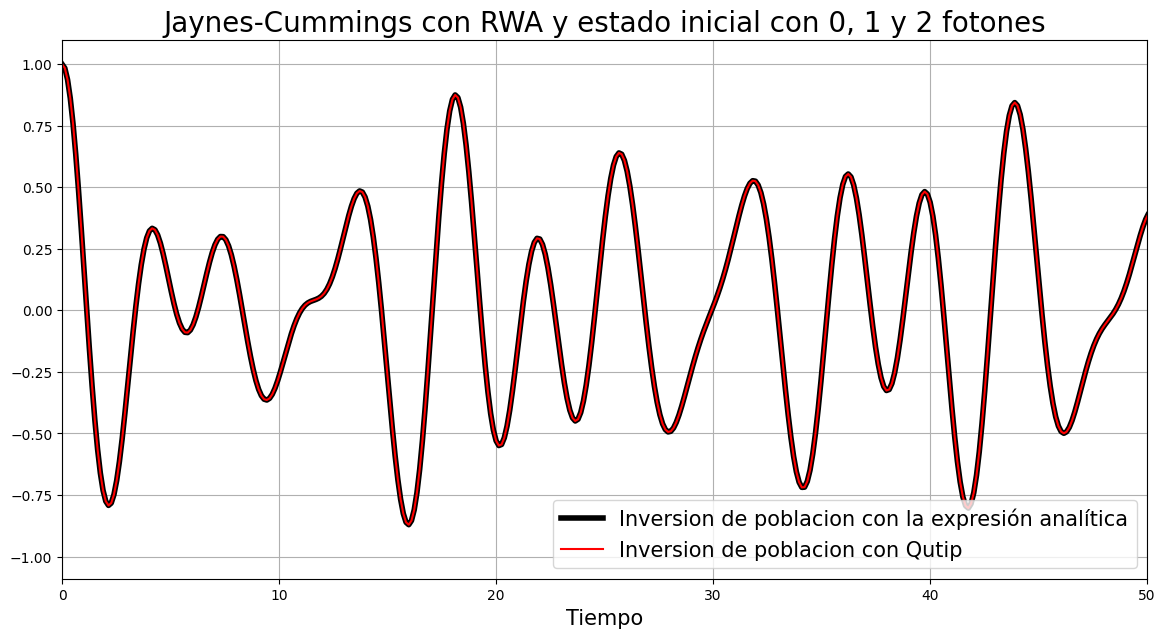

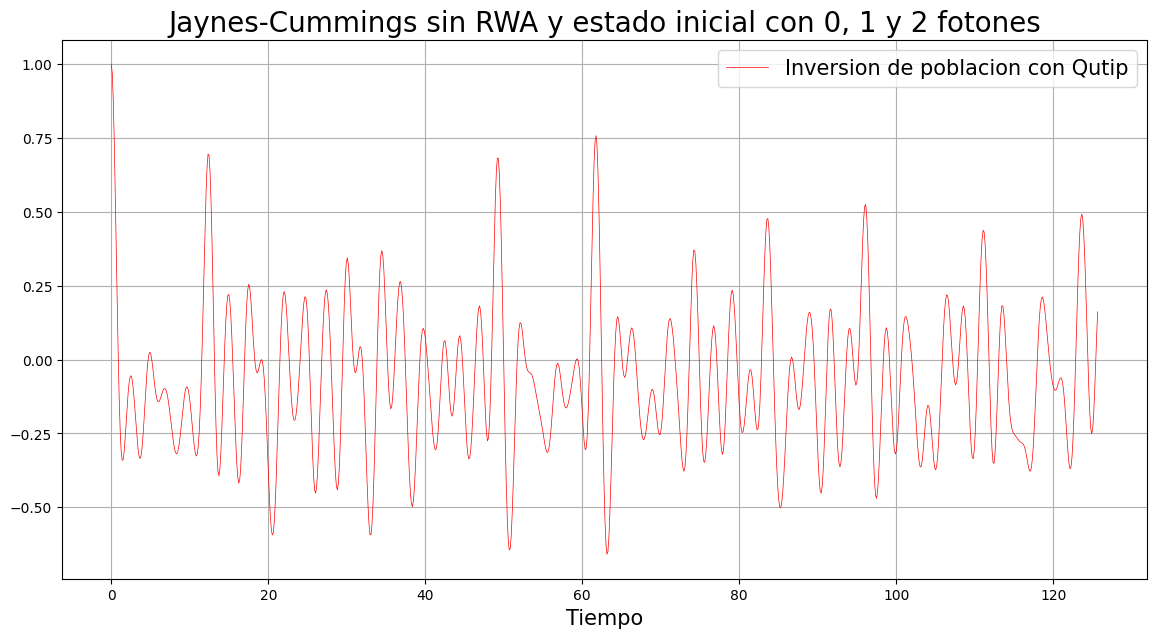

In [61]:
#Ahora quiero que mi estado inicial sea un estado de superposición de fotones 

psi01=tensor(basis(N1, 0)+basis(N1, 1)+basis(N1, 2), basis(2, 1)).unit()  # start with excited state 
#Escribamos la función analitica para la inversion de poblacion
def inversion(t,g):
    return (1/3)*(np.cos(2*g*t)+ np.cos( 2*np.sqrt(2)*g*t)+np.cos(2*np.sqrt(3)*g*t))

#def inversion2(t,g):
#    return (1/np.exp(1))*(np.cos(2*g*t)+ np.cos( 2*np.sqrt(2)*g*t)+(np.cos(np.sqrt(3)*g*t)**2)/2)


result3 = mesolve(H_01, psi01, t, [], [a.dag() * a, (sm.dag() * sm-sm *sm.dag()),sm *sm.dag(),sm.dag() * sm])
result4= mesolve(H_0, psi01, t, [], [a.dag() * a, (sm.dag() * sm-sm *sm.dag()),sm *sm.dag(),sm.dag() * sm])
#resolvamos el jayne cummings de toda la vida


# Graficamos la inversion de poblacion
plt.figure(figsize=(14,7))
plt.title(r"Jaynes-Cummings con RWA y estado inicial con 0, 1 y 2 fotones",fontsize=20)
plt.plot(t, inversion(t,g), label="Inversion de poblacion con la expresión analítica",color='black',lw=4)
plt.plot(t,result3.expect[1],label="Inversion de poblacion con Qutip",color='red')
#plt.plot(t, inversion2(t,g), label="Inversion de poblacion",color='blue')
plt.xlim(0,50)
plt.grid()
plt.xlabel('Tiempo',fontsize=15)
plt.legend(fontsize=15)
plt.show()

# Graficamos la inversion de poblacion
plt.figure(figsize=(14,7))
plt.title(r"Jaynes-Cummings sin RWA y estado inicial con 0, 1 y 2 fotones",fontsize=20)
plt.plot(t,result4.expect[1],label="Inversion de poblacion con Qutip",color='red',lw=0.5)
#plt.plot(t, inversion2(t,g), label="Inversion de poblacion",color='blue')
plt.grid()
plt.xlabel('Tiempo',fontsize=15)
plt.legend(fontsize=15)
plt.show()

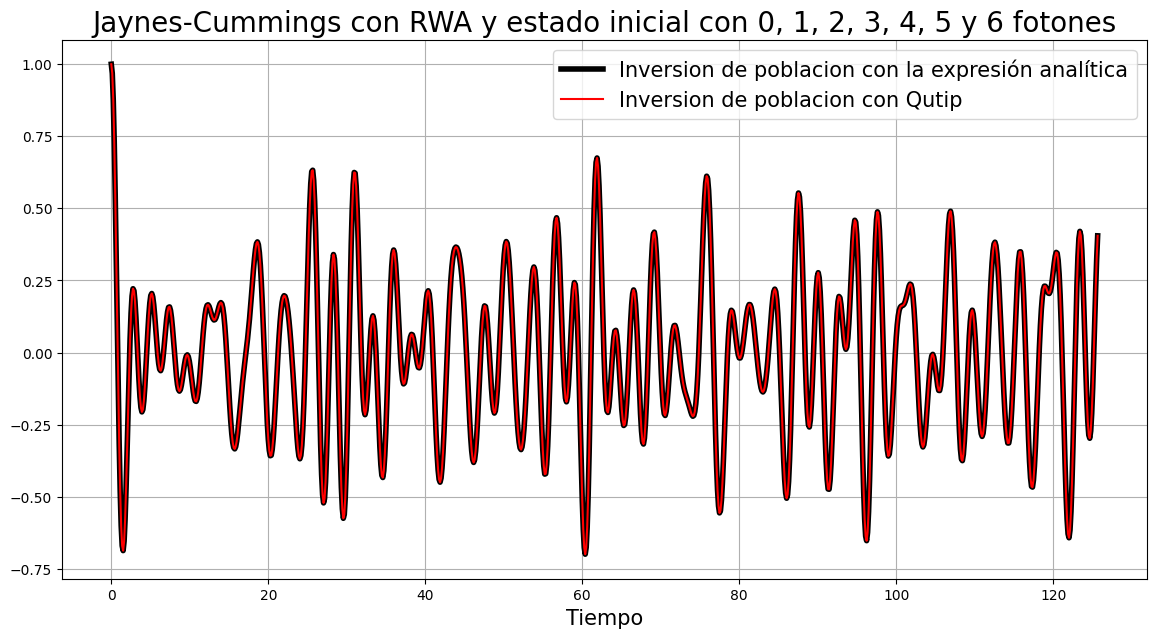

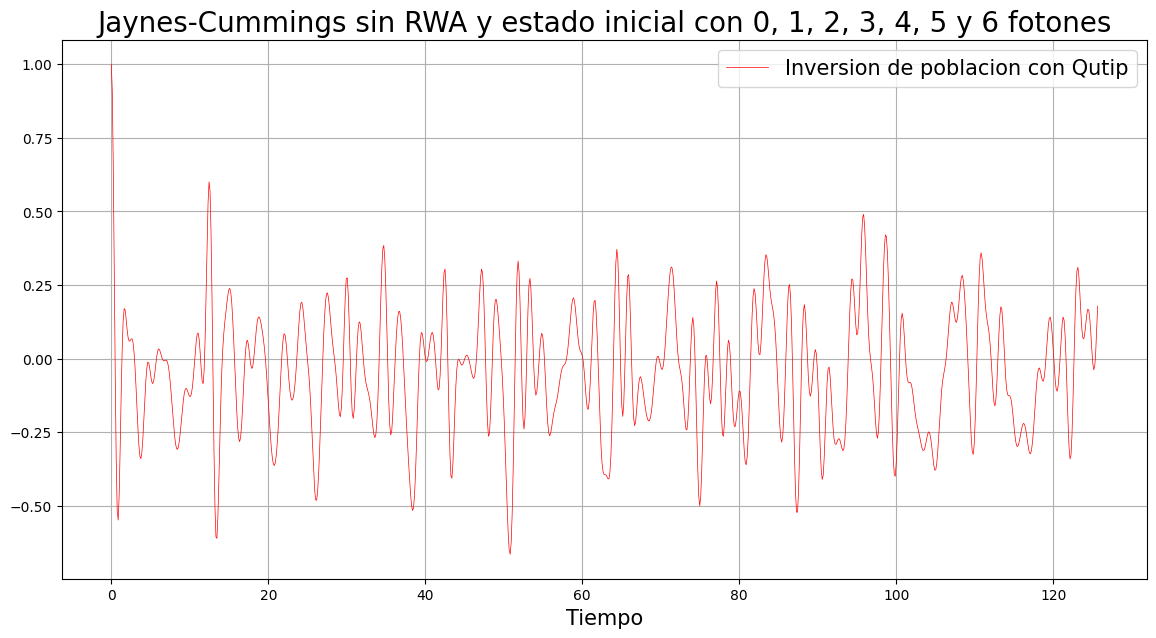

In [62]:
#Ahora quiero que mi estado inicial sea un estado de superposición con más fotones
psi02=tensor(basis(N1, 0)+basis(N1, 1)+basis(N1, 2)+basis(N1,3)+basis(N1,4)+basis(N1,5)+basis(N1,6), basis(2, 1)).unit()  # start with excited state
#Escribamos la función analitica para la inversion de poblacion
def inversion2(t,g):
    return (1/7)*(np.cos(2*g*t)+ np.cos( 2*np.sqrt(2)*g*t)+np.cos(2*np.sqrt(3)*g*t)+np.cos(2*np.sqrt(4)*g*t)+np.cos(2*np.sqrt(5)*g*t)+np.cos(2*np.sqrt(6)*g*t)+np.cos(2*np.sqrt(7)*g*t))

#def inversion2(t,g):
#    return (1/np.exp(1))*(np.cos(2*g*t)+ np.cos( 2*np.sqrt(2)*g*t)+(np.cos(np.sqrt(3)*g*t)**2)/2)


result5 = mesolve(H_01, psi02, t, [], [a.dag() * a, (sm.dag() * sm-sm *sm.dag()),sm *sm.dag(),sm.dag() * sm])
result6= mesolve(H_0, psi02, t, [], [a.dag() * a, (sm.dag() * sm-sm *sm.dag()),sm *sm.dag(),sm.dag() * sm])
#resolvamos el jayne cummings de toda la vida


# Graficamos la inversion de poblacion
plt.figure(figsize=(14,7))
plt.title(r"Jaynes-Cummings con RWA y estado inicial con 0, 1, 2, 3, 4, 5 y 6 fotones",fontsize=20)
plt.plot(t, inversion2(t,g), label="Inversion de poblacion con la expresión analítica",color='black',lw=4)
plt.plot(t,result5.expect[1],label="Inversion de poblacion con Qutip",color='red')
#plt.plot(t,result5.expect[1],label="Inversion de poblacion con Qutip",color='red')
#plt.plot(t, inversion2(t,g), label="Inversion de poblacion",color='blue')
plt.grid()
plt.xlabel('Tiempo',fontsize=15)
plt.legend(fontsize=15)
plt.show()

#Veamos la inversión de población sin RWA

# Graficamos la inversion de poblacion
plt.figure(figsize=(14,7))
plt.title(r"Jaynes-Cummings sin RWA y estado inicial con 0, 1, 2, 3, 4, 5 y 6 fotones",fontsize=20)
plt.plot(t,result6.expect[1],label="Inversion de poblacion con Qutip",color='red',lw=0.5)
#plt.plot(t, inversion2(t,g), label="Inversion de poblacion",color='blue')
plt.grid()
plt.xlabel('Tiempo',fontsize=15)

plt.legend(fontsize=15)
plt.show()



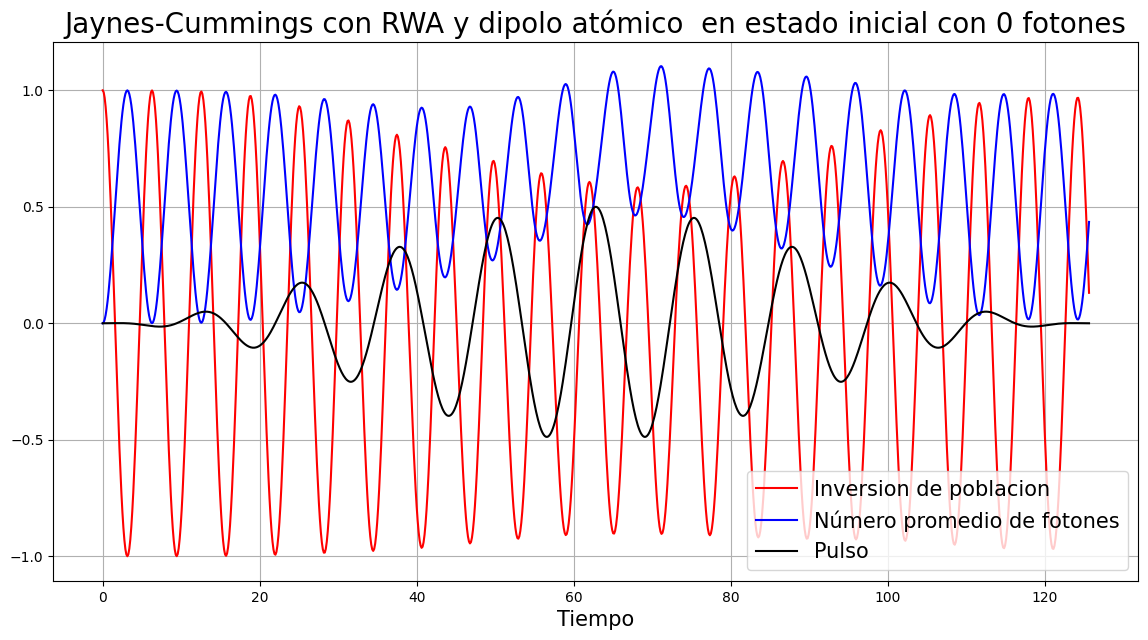

In [63]:

#Ahora veamos la evolución temporal con el Jaynes-Cummings como H0
result7 = mesolve(H, psi0, t, [], [a.dag() * a, (sm.dag() * sm-sm *sm.dag()),sm *sm.dag(),sm.dag() * sm])

# Graficamos la inversion de poblacion
plt.figure(figsize=(14,7))
plt.title(r"Jaynes-Cummings con RWA y dipolo atómico  en estado inicial con 0 fotones",fontsize=20)
plt.plot(t,result7.expect[1],label="Inversion de poblacion",color='red')
plt.plot(t,result7.expect[0],label="Número promedio de fotones",color='blue')
plt.plot(t,pulso2(t)*0.5,label="Pulso",color='black')
plt.grid()
plt.xlabel('Tiempo',fontsize=15)
plt.legend(fontsize=15)
plt.show()




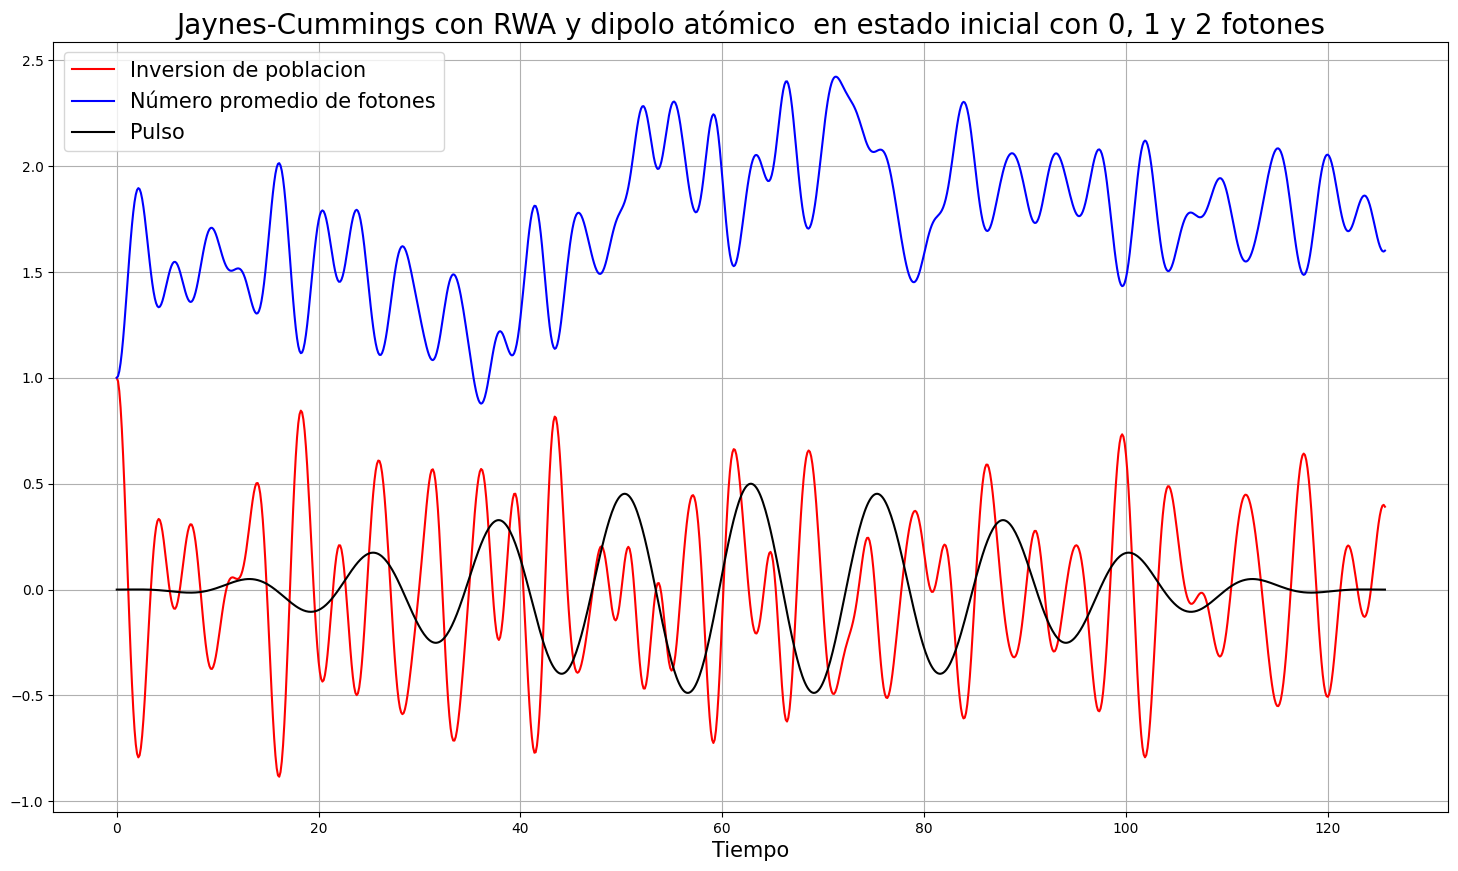

In [64]:

#Ahora veamos la evolución temporal con el Jaynes-Cummings como H0
result8 = mesolve(H, psi01, t, [], [a.dag() * a, (sm.dag() * sm-sm *sm.dag()),sm *sm.dag(),sm.dag() * sm])

# Graficamos la inversion de poblacion
plt.figure(figsize=(18,10))
plt.title(r"Jaynes-Cummings con RWA y dipolo atómico  en estado inicial con 0, 1 y 2 fotones",fontsize=20)
plt.plot(t,result8.expect[1],label="Inversion de poblacion",color='red')
plt.plot(t,result8.expect[0],label="Número promedio de fotones",color='blue')
plt.plot(t,pulso2(t)*0.5,label="Pulso",color='black')
plt.grid()
plt.xlabel('Tiempo',fontsize=15)
plt.legend(fontsize=15)
plt.show()

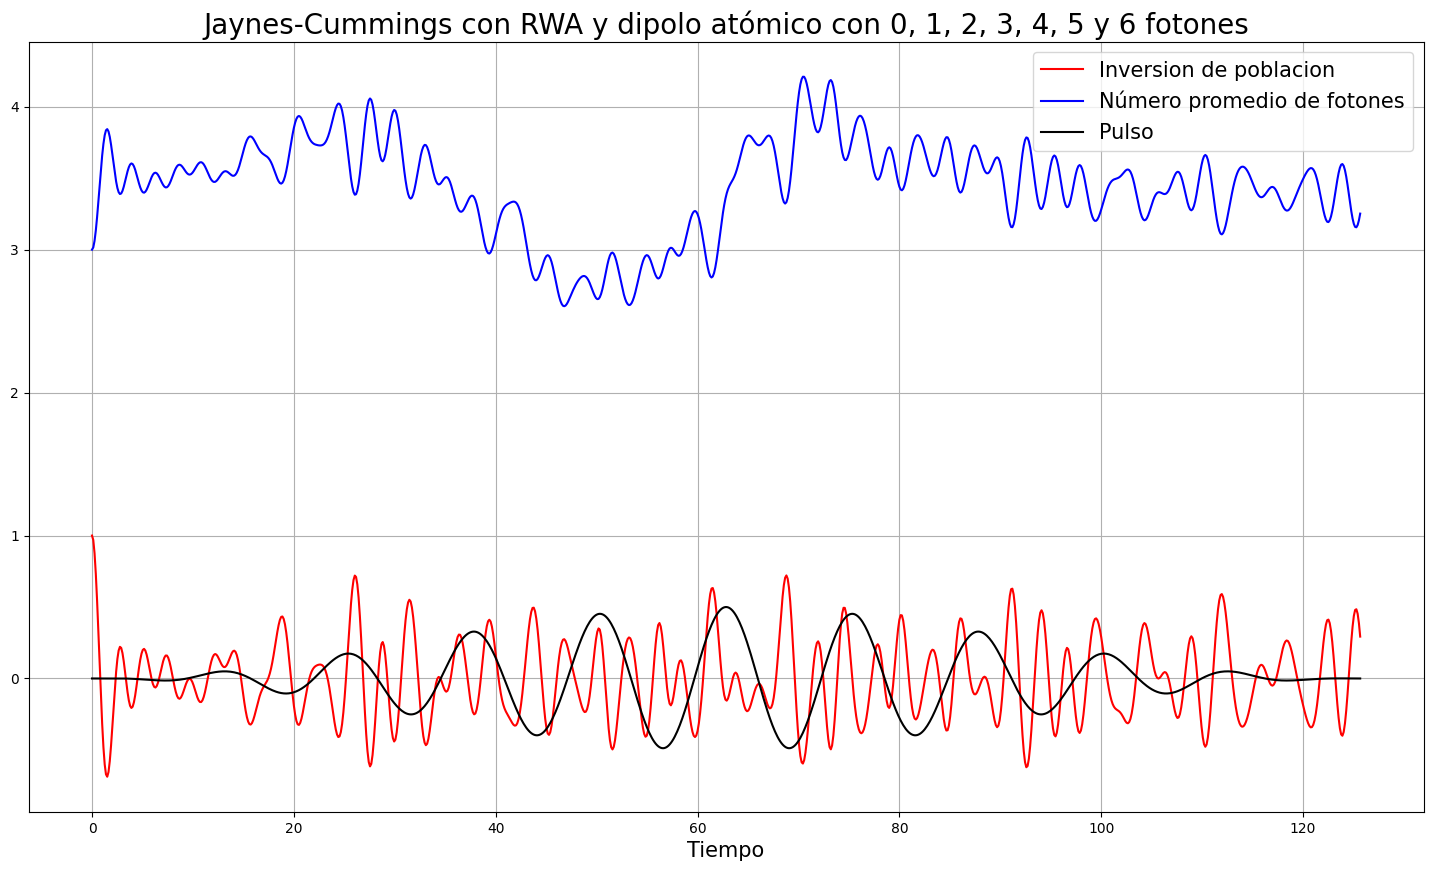

In [65]:

#Ahora veamos la evolución temporal con el Jaynes-Cummings como H0
result9 = mesolve(H, psi02, t, [], [a.dag() * a, (sm.dag() * sm-sm *sm.dag()),sm *sm.dag(),sm.dag() * sm])

# Graficamos la inversion de poblacion
plt.figure(figsize=(18,10))
plt.title(r"Jaynes-Cummings con RWA y dipolo atómico con 0, 1, 2, 3, 4, 5 y 6 fotones",fontsize=20)
plt.plot(t,result9.expect[1],label="Inversion de poblacion",color='red')
plt.plot(t,result9.expect[0],label="Número promedio de fotones",color='blue')
plt.plot(t,pulso2(t)*0.5,label="Pulso",color='black')
plt.grid()
plt.xlabel('Tiempo',fontsize=15)
plt.legend(fontsize=15)
plt.show()

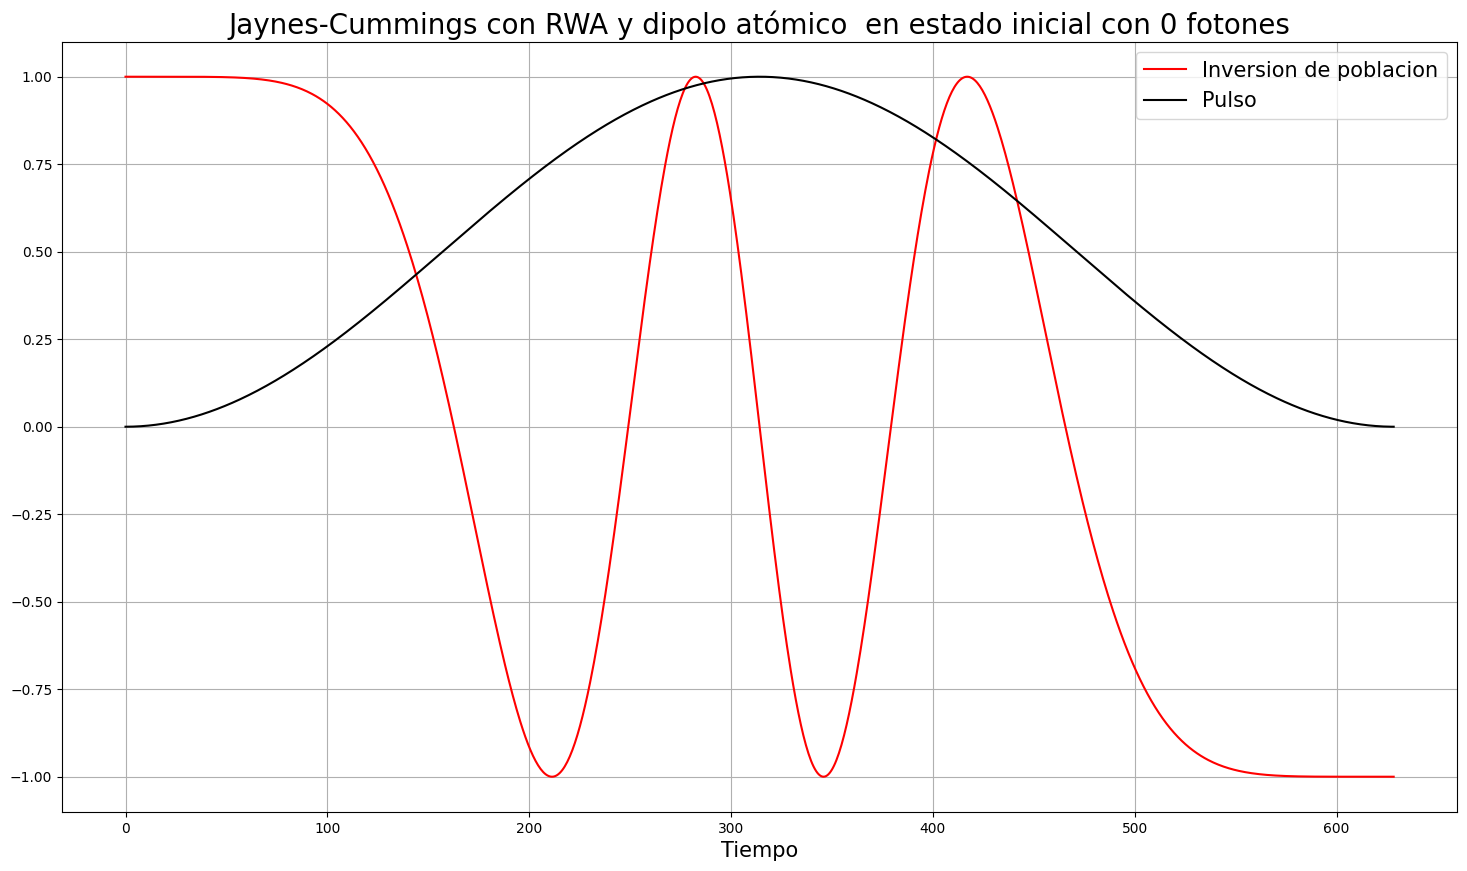

In [77]:
# Definimos las constantes necesarias
hbar = 1.0
N = 2
N1=50
#N1=3
omega_l = 0.5
omega_r = 0.5
omega_m = 0.5
g=0.025
mu=1

T=5*np.pi/(g)
# Definimos la funcion que nos da el pulso
def pulso(t, args):
    return 0.01*(np.sin(np.pi*t/T)**2) * np.cos(omega_l * (t-T/2))

def pulso_l(t, args):
    return g*np.sin(np.pi*t/T)**2

def pulso2(t):
    return (np.sin(np.pi*t/T)**2) * np.cos(omega_l * (t-T/2))

def pulso3(t):
    return (np.sin(np.pi*t/T)**2) 

#Escribamos la función analitica para la inversion de poblacion
def inversion0(t,g,n):
    return np.cos(2*g*t*np.sqrt(n+1))

psi01 = tensor(basis(N1, 0), basis(2, 1))  # start with an ground state for the atoms and zero photons
psi00 = tensor(basis(N1, 1), basis(2, 0))  # start with an ground state for the atoms and one photon

# operators
a = tensor(destroy(N1), qeye(2))
sm = tensor(qeye(N1), destroy(2))
#Definamos sigma x y sigma y#plt.plot(t,-(result.expect[2]-result.expect[3]),label="Sigma y - Sigma x")


# Hamiltonian

H_0 = omega_r * a.dag() * a + 0.5*omega_m * (sm.dag() * sm-sm *sm.dag()) + g * (a.dag() + a) * (sm + sm.dag())
H_01 = omega_r * a.dag() * a + 0.5*omega_m * (sm.dag() * sm-sm *sm.dag()) + g * (a.dag()*sm + a*sm.dag()) 
H02 = omega_r * a.dag() * a + 0.5*omega_m * (sm.dag() * sm-sm *sm.dag())
H03 = 0.5*omega_m * (sm.dag() * sm-sm *sm.dag())

# Definimos el tiempo discreto
num_steps = 1000
t = np.linspace(0, T, num_steps)

HI1 = (sm + sm.dag())*mu
HI2 = (a + a.dag())*0.5
HI3 = ((sm + sm.dag()) + (a + a.dag())*0.5)
HI4 = (a.dag()*sm + a*sm.dag())

# Definimos el Hamiltoniano total
H= [H_01, [HI1, pulso]]
H1= [H_01, [HI2, pulso]]
H2 = [H_01, [HI1, pulso], [HI2, pulso]]
H3 = [H02, [HI4, pulso_l]]
H4 = [H02, [HI4, pulso_l]]
H5 =[H02, [HI4, pulso_l], [HI1, pulso]]
H6 =[H03, [HI1, pulso]]

#Ahora modifiquemos la constante de acoplamiento

result10 = mesolve(H4, psi01, t, [], [a.dag() * a, (sm.dag() * sm-sm *sm.dag()),sm *sm.dag(),sm.dag() * sm])

# Graficamos la inversion de poblacion
plt.figure(figsize=(18,10))
plt.title(r"Jaynes-Cummings con RWA y dipolo atómico  en estado inicial con 0 fotones",fontsize=20)
plt.plot(t,result10.expect[1],label="Inversion de poblacion",color='red')
#plt.plot(t,result10.expect[0],label="Número promedio de fotones",color='blue')
#plt.plot(t, result10.expect[2], label="Sigma x",color='green')
#plt.plot(t, result10.expect[3], label="Sigma y",color='black')
plt.plot(t,pulso3(t),label="Pulso",color='black')
plt.grid()
plt.xlabel('Tiempo',fontsize=15)
plt.legend(fontsize=15)
plt.show()


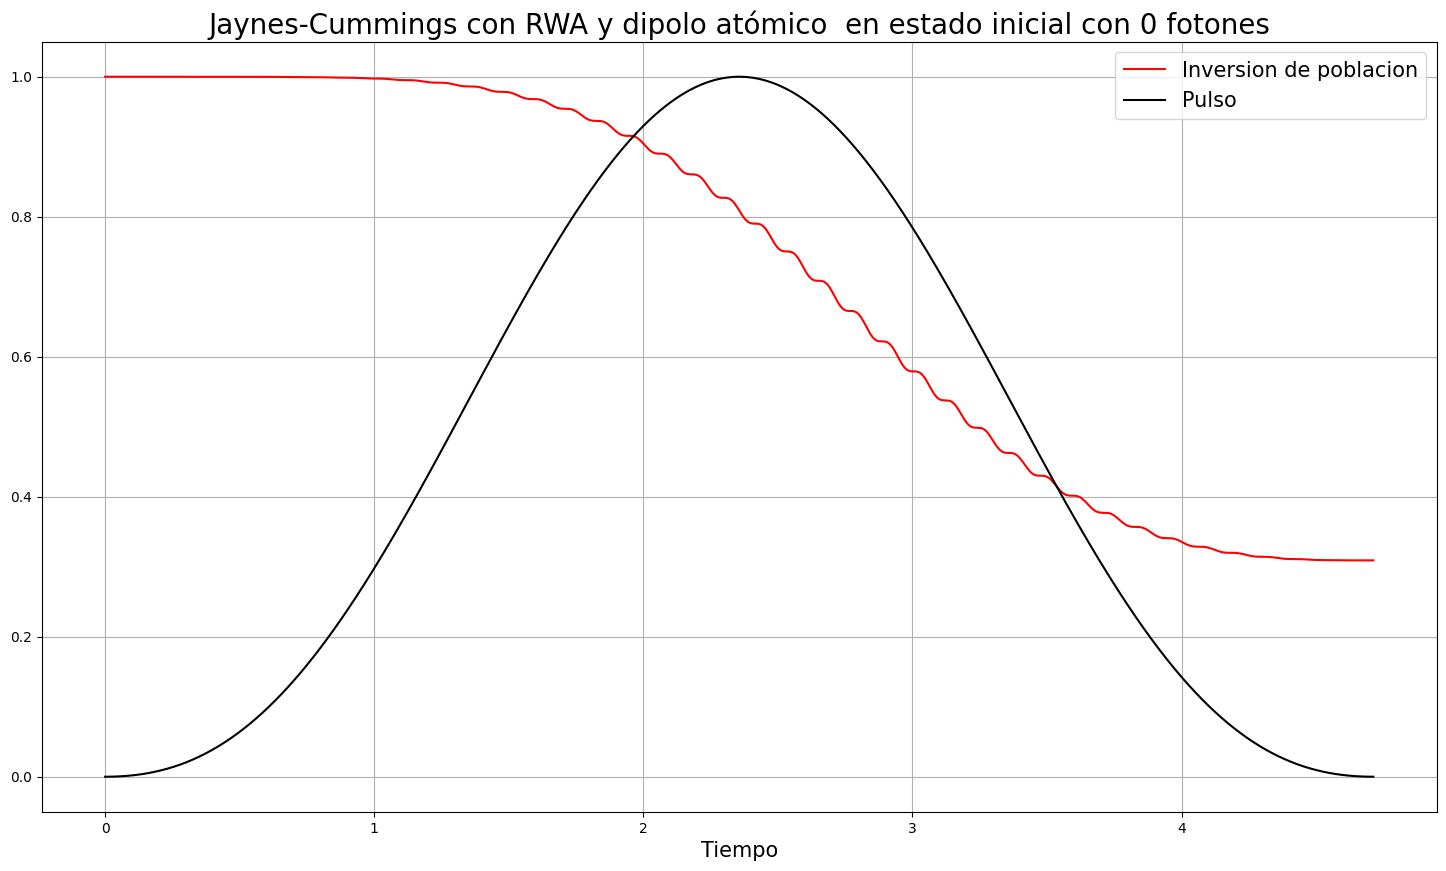

In [70]:

result11 = mesolve(H6, psi01, t, [], [a.dag() * a, (sm.dag() * sm-sm *sm.dag()),sm *sm.dag(),sm.dag() * sm])
E0=1
mu=1
T=3*np.pi/(2*mu*E0)
t = np.linspace(0, T, num_steps)
# Graficamos la inversion de poblacion
plt.figure(figsize=(18,10))
plt.title(r"Jaynes-Cummings con RWA y dipolo atómico  en estado inicial con 0 fotones",fontsize=20)
plt.plot(t,result11.expect[1],label="Inversion de poblacion",color='red')
#plt.plot(t,result10.expect[0],label="Número promedio de fotones",color='blue')
#plt.plot(t, result10.expect[2], label="Sigma x",color='green')
#plt.plot(t, result10.expect[3], label="Sigma y",color='black')
plt.plot(t,pulso2(t),label="Pulso",color='black')
plt.grid()
plt.xlabel('Tiempo',fontsize=15)
plt.legend(fontsize=15)
plt.show()

In [68]:
1/(0.5*0.01)

200.0